In [91]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


In [64]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Breast Cancer Prediction/data/breastcancerwinscon.csv")

In [79]:
print(df.describe().T)

                         count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               

In [82]:

#df = df.dropna()
df=df.drop('Unnamed: 32',axis = 1)
print(df.isnull().sum())


id                         0
Label                      0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [67]:
df = df.rename(columns={'diagnosis':'Label'})
print(df.dtypes)

id                           int64
Label                       object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

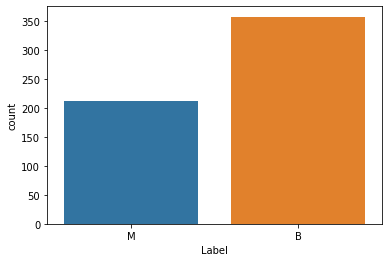

In [68]:
sns.countplot(x="Label",data=df)

In [69]:
####replace categorical values with numericals####
print("Distribution of Data : ", df["Label"].value_counts())

Distribution of Data :  B    357
M    212
Name: Label, dtype: int64


In [70]:
##Define the dependent variable that has to be predicted##
y = df["Label"].values 
print("Labels before encoding are : ",np.unique(y))

Labels before encoding are :  ['B' 'M']


In [71]:
#converting categorical data into 0 and 1 #
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)#M=1 and B=0
print("Labels after encoding are : ",np.unique(y))

Labels after encoding are :  [0 1]


In [84]:
#Define x and normalize values#
#Define the independent variables. Drop label and ID, and normalize other data#
X = df.drop(labels = ["Label","id"],axis=1)
print(X.describe().T) #needs scaling

                         count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se             

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,train_size = 0.75)
print("Shape of training data is :",X_train.shape)
print("Shape of testing data is :",X_test.shape)



Shape of training data is : (426, 30)
Shape of testing data is : (143, 30)


In [75]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout

In [87]:
model=Sequential()
model.add(Dense(16,input_dim = 30 ,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 16)                496       
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
 activation_5 (Activation)   (None, 1)                 0         
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________
None


In [88]:
history = model.fit(X_train, y_train, verbose=1, epochs=100, batch_size=64,validation_data=(X_test,y_test))

Epoch 1/100
7/7 [==============================] - 1s 28ms/step - loss: 0.7121 - accuracy: 0.4484 - val_loss: 0.7116 - val_accuracy: 0.3916
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 0.7079 - accuracy: 0.4577 - val_loss: 0.6925 - val_accuracy: 0.4965
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6873 - accuracy: 0.5493 - val_loss: 0.6740 - val_accuracy: 0.6224
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6739 - accuracy: 0.5939 - val_loss: 0.6567 - val_accuracy: 0.7343
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6587 - accuracy: 0.6737 - val_loss: 0.6404 - val_accuracy: 0.7972
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6367 - accuracy: 0.7277 - val_loss: 0.6238 - val_accuracy: 0.8252
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6245 - accuracy: 0.7394 - val_loss: 0.6074 - val_accuracy: 0.8531
Epoch 8/100
7/7 [=========

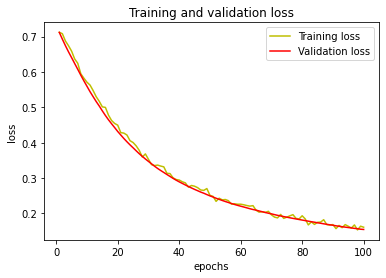

In [96]:
#plotting the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title("Training and validation loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()
plt.show()



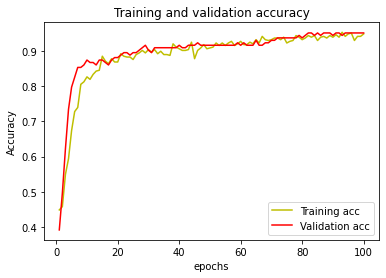

In [98]:
#plotting the training and validation accuracy and loss at each epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs,acc,'y',label='Training acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')
plt.title("Training and validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [103]:
#precdicting the test set results
y_pred = model.predict(X_test)
print(y_pred)
y_pred = (y_pred > 0.5)



[[0.09099081]
 [0.04117237]
 [0.08472272]
 [0.0427229 ]
 [0.03660842]
 [0.04245748]
 [0.19744158]
 [0.0996362 ]
 [0.02304213]
 [0.47961345]
 [0.7369946 ]
 [0.0462373 ]
 [0.56980836]
 [0.00524675]
 [0.30257884]
 [0.03035504]
 [0.26139504]
 [0.9886747 ]
 [0.19354346]
 [0.95836717]
 [0.9991793 ]
 [0.03465297]
 [0.96045035]
 [0.2860346 ]
 [0.6914888 ]
 [0.05851578]
 [0.9989336 ]
 [0.9914731 ]
 [0.0212226 ]
 [0.00504631]
 [0.9400998 ]
 [0.06604513]
 [0.9889949 ]
 [0.957117  ]
 [0.99455595]
 [0.02986035]
 [0.49248752]
 [0.9700057 ]
 [0.21547844]
 [0.25973454]
 [0.02135362]
 [0.99997747]
 [0.54058075]
 [0.05452098]
 [0.15799059]
 [0.2857824 ]
 [0.82394207]
 [0.9857773 ]
 [0.01956358]
 [0.99907255]
 [0.0183921 ]
 [0.9826403 ]
 [0.05368989]
 [0.99999785]
 [0.97701424]
 [0.03850517]
 [0.9960134 ]
 [0.00834934]
 [0.88613224]
 [0.01794088]
 [0.32800958]
 [0.00405527]
 [0.9951748 ]
 [0.99987495]
 [0.01258698]
 [0.94781923]
 [0.13315977]
 [0.7583563 ]
 [0.822698  ]
 [0.01856326]
 [0.99950373]
 [0.06

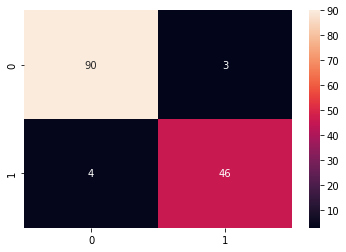

In [102]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)